In [2]:
import xarray as xr
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pickle
import constants
from utils.utils import *

create_grid_domains()

41 45 -93 -89
41.0 44.75 -93.0 -89.25
41 45 -89 -85
41.0 44.75 -89.0 -85.25
41 45 -85 -81
41.0 44.75 -85.0 -81.25
45 49 -93 -89
45.0 48.75 -93.0 -89.25
45 49 -89 -85
45.0 48.75 -89.0 -85.25
45 49 -85 -81
45.0 48.75 -85.0 -81.25


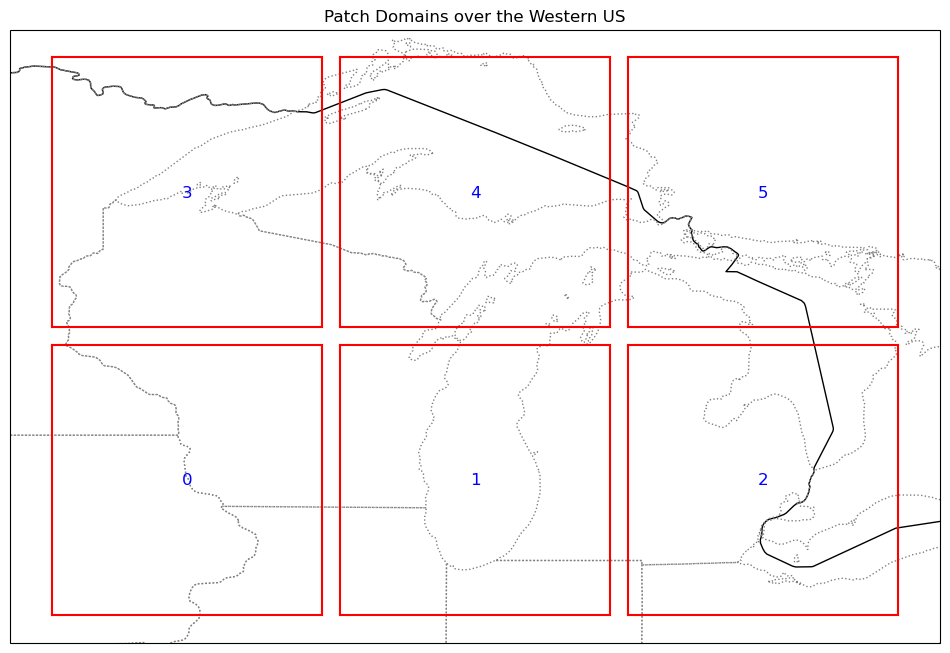

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pickle

def plot_grid_domains(grid_file):
    # Load the grid domains
    with open(grid_file, 'rb') as f:
        grid_domains = pickle.load(f)

    # Create a figure and axis with the correct projection
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    # ax.set_extent([-125, -97, 30, 60], ccrs.PlateCarree())  # Western US region

    # Add features to the map
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')

    # Plot each grid domain
    for domain_id, (lat_start, lat_end, lon_start, lon_end) in grid_domains.items():
        print(lat_start, lat_end, lon_start, lon_end)

        lat_values = np.arange(lat_start, lat_end, 0.25)
        lon_values = np.arange(lon_start, lon_end, 0.25)

        print(min(lat_values), max(lat_values), min(lon_values), max(lon_values))
        
        # Define the corner points of the grid box
        lon_min, lon_max = lon_values[0], lon_values[-1]
        lat_min, lat_max = lat_values[0], lat_values[-1]
        
        # Plot the rectangle for the grid domain
        ax.plot([lon_min, lon_max], [lat_min, lat_min], color='red')
        ax.plot([lon_min, lon_max], [lat_max, lat_max], color='red')
        ax.plot([lon_min, lon_min], [lat_min, lat_max], color='red')
        ax.plot([lon_max, lon_max], [lat_min, lat_max], color='red')
        
        # Place the domain ID in the center of the grid box
        ax.text((lon_min + lon_max) / 2, (lat_min + lat_max) / 2, str(domain_id), 
                color='blue', fontsize=12, ha='center', va='center')
    
    plt.title('Patch Domains')
    plt.savefig('figures/patches.png')

# Usage
grid_file = f'{constants.domains_dir}/grid_domains.pkl'
plot_grid_domains(grid_file)